In [3]:
import re
import string
import email
import json
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [98]:

def process_email(message):
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    sw = stopwords.words('english')
    words = [word for word in words if word not in sw]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]   
    return words

def remove_hyperlink(word):
    result = re.sub(r"http\S+", "", word)
    return result

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word
    for znak in string.punctuation:
        if znak in word:
            result = result.replace(znak, ' ')
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n',' ')

def replace_tab(word):
    return word.replace('\t',' ')

def clean_up_pipeline(sentence):
    cleaning_utils = [replace_newline,
                      replace_tab,
                      to_lower,
                      remove_number,
                      remove_hyperlink,
                      remove_punctuation,
                      remove_whitespace,
                      process_email]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [78]:
folders = ['C:/Users/admin/Desktop/ING_1.ročník/ZS_2020-2021/VINF/trec05p', 'C:/Users/admin/Desktop/ING_1.ročník/ZS_2020-2021/VINF/trec06p', 'C:/Users/admin/Desktop/ING_1.ročník/ZS_2020-2021/VINF/trec07p/trec07p']

id = 0

for folder in folders:
    with open(folder + '/full/index', 'r') as ifile:
        raw_labels = ifile.readlines()

    for label in raw_labels:
        mail = {}
        if 'trec07p' in folder:
            match_0 = re.search(r'((?:sp|h)am) ../data/inmail.(\d{1,})', label)
            if match_0:
                class_ = match_0.group(1)
                email_num = match_0.group(2)
                mail['Email_number'] = id
                mail['Class'] = class_
        else:
            match_0 = re.search(r'((?:sp|h)am) ../data/(\d{1,})/(\d{1,})', label)
            if match_0:
                class_ = match_0.group(1)
                email_num = match_0.group(3)
                folder_num = match_0.group(2)
                mail['Email_number'] = id
                mail['Class'] = class_
        id += 1

        if 'trec07p' in folder:
            path = folder + '/data/inmail.' + email_num
        else:
            path = folder + '/data/' + folder_num + '/' + email_num

        with open(path, 'rb') as email_file:
            message = email.message_from_binary_file(email_file)
            body = ''
            
            if message.is_multipart():
                for part in message.walk():
                    content_type = part.get_content_type()
                    content_disposition = str(part.get('Content-Disposition'))
                    
                    if (content_type in ['text/html', 'text/txt'] and 'attachment' not in content_disposition):
                        body = part.get_payload(decode=True)
                        break
            else:
                body = message.get_payload(decode=True)
                
            mail['Body'] = BeautifulSoup(body, 'html.parser').get_text(strip=True)

        with open(path, 'r', encoding='ISO-8859-1') as email_file:
            for line in email_file.readlines():
                match_1 = re.search(r'^From: (.*)$', line)
                if match_1:
                    mail['Sender'] = match_1.group(1)
                match_2 = re.search(r'^To: (.*)$', line)
                if match_2:
                    mail['Receiver'] = match_2.group(1)
                match_3 = re.search(r'^Date: (.*)$', line)
                if match_3:
                    mail['Date'] = match_3.group(1)
                match_4 = re.search(r'^Subject: (.*)$', line)
                if match_4:
                    mail['Subject'] = match_4.group(1)
        
        with open("data_proccessed.json", 'a+') as file:
            json.dump(mail, file)
            file.write('\n')

        if mail['Class'] == 'spam':
            with open("spams.json", 'a+') as file:
                json.dump(mail, file)
                file.write('\n')
        else:
            with open("hams.json", 'a+') as file:
                json.dump(mail, file)
                file.write('\n')

RACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACE

In [86]:
import random
import numpy as np

#count_spam = sum(1 for line in open('spams.json'))
#count_ham = sum(1 for line in open('hams.json'))

train = []
test = []
spam = []
ham = []

with open('hams.json') as f:
    for line in f:
        ham.append(json.loads(line)['Email_number'])

train = random.sample(ham, int(count_ham*0.7))
test = np.setdiff1d(ham,train)

with open('hams.json') as f:
    for line in f:
        helper = json.loads(line)
        if helper['Email_number'] in train:
            with open("train.json", 'a+') as file:
                json.dump(helper, file)
                file.write('\n')
        else:
            with open("test.json", 'a+') as file:
                json.dump(helper, file)
                file.write('\n')

train = []
test = []

with open('spams.json') as f:
    for line in f:
        spam.append(json.loads(line)['Email_number'])

train = random.sample(spam, int(count_spam*0.7))
test = np.setdiff1d(spam,train)

with open('spams.json') as f:
    for line in f:
        helper = json.loads(line)
        if helper['Email_number'] in train:
            with open("train.json", 'a+') as file:
                json.dump(helper, file)
                file.write('\n')
        else:
            with open("test.json", 'a+') as file:
                json.dump(helper, file)
                file.write('\n')

In [137]:
from math import log, sqrt

class SpamClassifier(object):
    def __init__(self, train_data_path, method = 'tf-idf'):
        self.mails = train_data_path
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) / (self.spam_words)
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) / (self.ham_words)

    def calc_TF_and_IDF(self):
        self.spam_mails_count = 0
        self.ham_mails_count = 0
        self.total_mails = sum(1 for line in open(self.mails))
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        with open(self.mails) as f:
            for line in f:
                mail = json.loads(line)
                if mail['Class'] == 'spam':
                    self.spam_mails_count += 1
                else:
                    self.ham_mails_count += 1

                message_processed = clean_up_pipeline(mail['Body'])
                count = list()

                for word in message_processed:
                    if mail['Class'] == 'spam':
                        self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                        self.spam_words += 1
                    else:
                        self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                        self.ham_words += 1
                    if word not in count:
                        count += [word]
                for word in count:
                    if mail['Class'] == 'spam':
                        self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                    else:
                        self.idf_ham[word] = self.idf_ham.get(word, 0) + 1 

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails_count + self.ham_mails_count) / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word]) / (self.sum_tf_idf_spam)
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails_count + self.ham_mails_count) / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word]) / (self.sum_tf_idf_ham)
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])

            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])

        return pSpam >= pHam
    
    def predict(self, test_data_path):
        true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0

        with open(test_data_path) as f:
            for line in f:
                mail = json.loads(line)
                message_processed = clean_up_pipeline(mail['Body'])
                result = int(self.classify(message_processed))

                true_pos += int(mail['Class'] == 'spam' and result == 1)
                true_neg += int(mail['Class'] == 'ham' and result == 0)
                false_pos += int(mail['Class'] == 'ham' and result == 1)
                false_neg += int(mail['Class'] == 'spam' and result == 0)

        self.precision = true_pos / (true_pos + false_pos)
        self.recall = true_pos / (true_pos + false_neg)
        self.Fscore = 2 * self.precision * self.recall / (self.precision + self.recall)
        self.accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

In [131]:
sc_bow = SpamClassifier('train.json', 'bow')
sc_bow.train()
sc_bow.predict('test.json')

In [132]:
print(sc_bow.precision)
print(sc_bow.recall)
print(sc_bow.Fscore)
print(sc_bow.accuracy)

0.5989992556446944
0.3774986317792083
0.463127268076671
0.45508680837254584


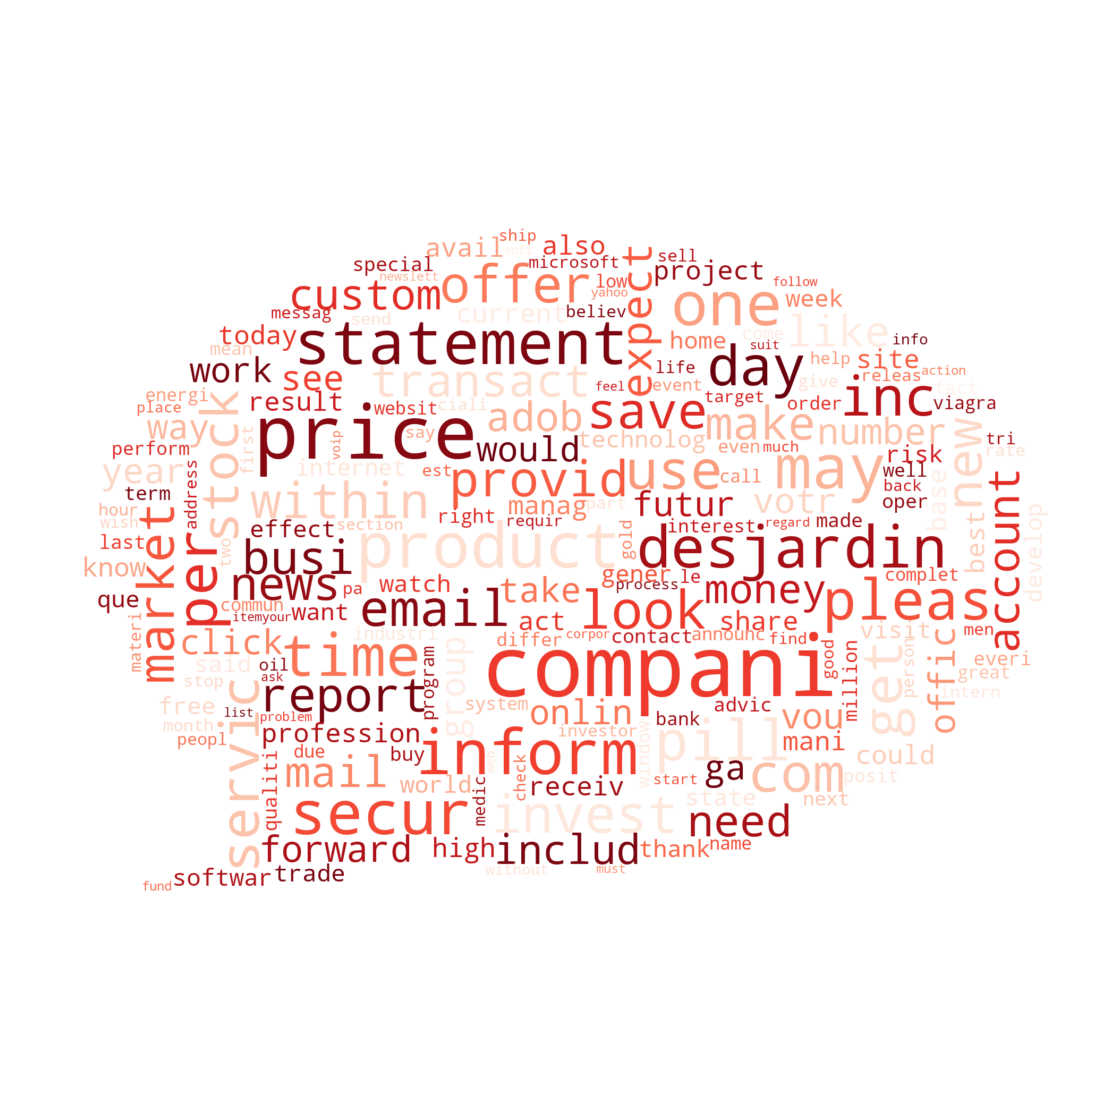

In [161]:
import os
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as ab
comment_mask = np.array(Image.open("comment.png"))

wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate_from_frequencies(sc_bow.tf_spam)

ab.figure(figsize=[40,20])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")
ab.margins(x=0, y=0)
ab.show()

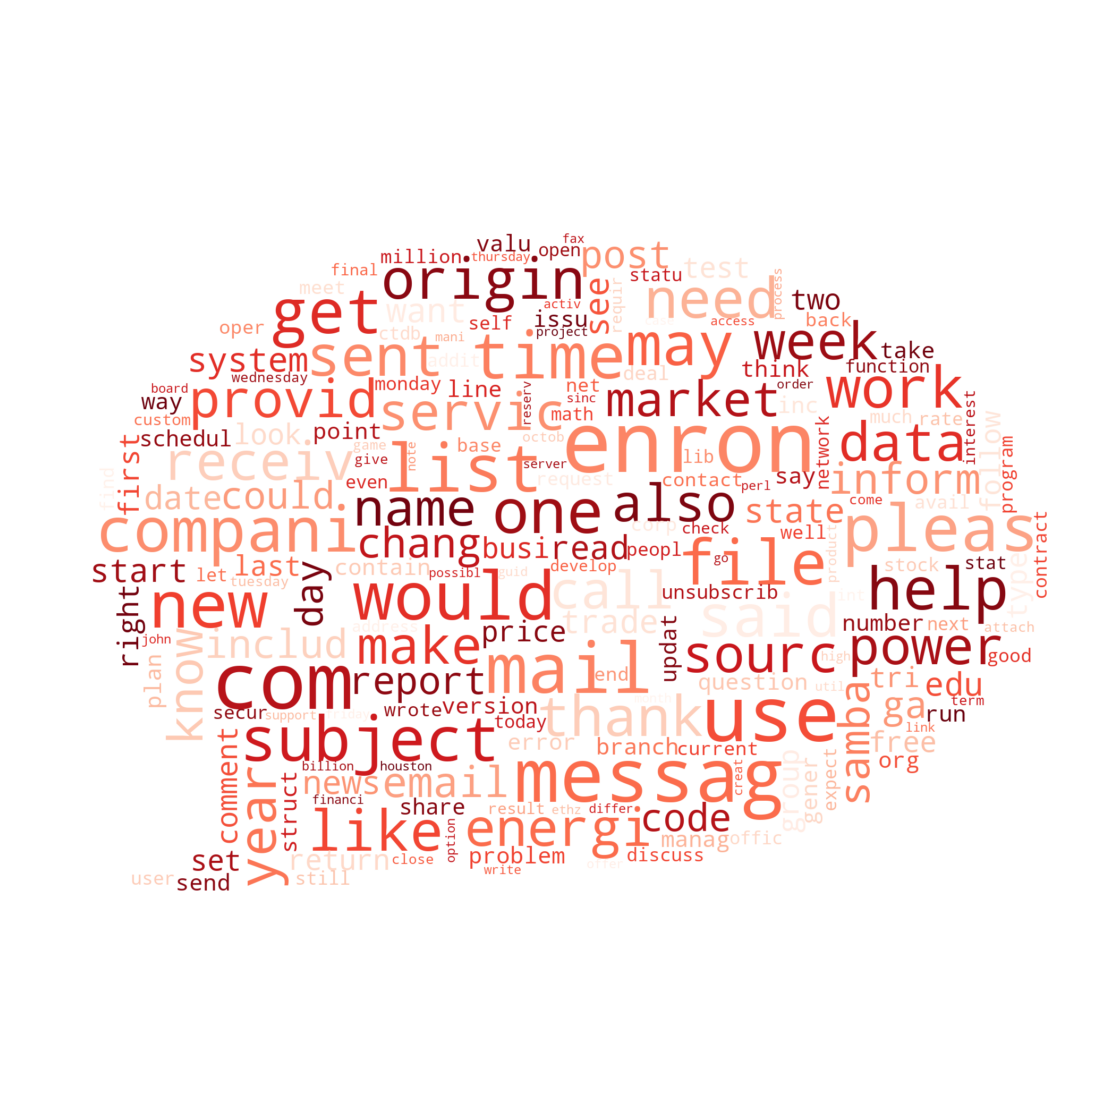

In [162]:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate_from_frequencies(sc_bow.tf_ham)

ab.figure(figsize=[40,20])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")
ab.margins(x=0, y=0)
ab.show()

In [171]:
pm = clean_up_pipeline('Congratulation. We have good offer to you. Follow link in description to get more infromation.')
sc_bow.classify(pm)

True

In [142]:
sc_tf_idf = SpamClassifier('train.json', 'tf-idf')
sc_tf_idf.train()
sc_tf_idf.predict('test.json')

In [143]:
print(sc_tf_idf.precision)
print(sc_tf_idf.recall)
print(sc_tf_idf.Fscore)
print(sc_tf_idf.accuracy)

0.6153249773872593
0.37231242344478904
0.463921543157758
0.46428687327600193


In [180]:
import pandas as pd

train_data = pd.read_json('train.json', lines=True)
train_data.drop(['Date', 'Receiver', 'Subject', 'Sender', 'Email_number'], axis = 1, inplace = True)
train_data['Class'] = train_data['Class'].map({'ham': 0, 'spam': 1})
trainIndex, testIndex = list(), list()
for i in range(train_data.shape[0]):
    if np.random.uniform(0, 1) < 0.30:
        trainIndex += [i]
train_data = train_data.loc[trainIndex]
train_data.reset_index(inplace = True)
train_data.drop(['index'], axis = 1, inplace = True)

test_data = pd.read_json('test.json', lines=True)
test_data.drop(['Date', 'Receiver', 'Subject', 'Sender', 'Email_number'], axis = 1, inplace = True)
test_data['Class'] = test_data['Class'].map({'ham': 0, 'spam': 1})
for i in range(test_data.shape[0]):
    if np.random.uniform(0, 1) < 0.30:
        testIndex += [i]
test_data = test_data.loc[testIndex]
test_data.reset_index(inplace = True)
test_data.drop(['index'], axis = 1, inplace = True)

x_train = train_data['Body']
y_train = train_data['Class']
x_test = test_data['Body']
y_test = test_data['Class']

In [181]:
x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

In [182]:
#x_train = [" ".join(o) for o in x_train]
#x_test = [" ".join(o) for o in x_test]
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, precision_score,recall_score
vectorizer = TfidfVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return vectorizer.transform(raw_sentences)

x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

clf = MultinomialNB()
clf.fit(x_train_features.toarray(),y_train)
clf.score(x_test_features.toarray(),y_test)

y_predict = clf.predict(x_test_features.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))

MemoryError: Unable to allocate 78.7 GiB for an array with shape (43208, 244362) and data type float64

In [179]:
pm = clean_up_pipeline('Hello Peter, I am sedning you stuff we were talking about. Bye, David')
sc_tf_idf.classify(pm)

False